In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


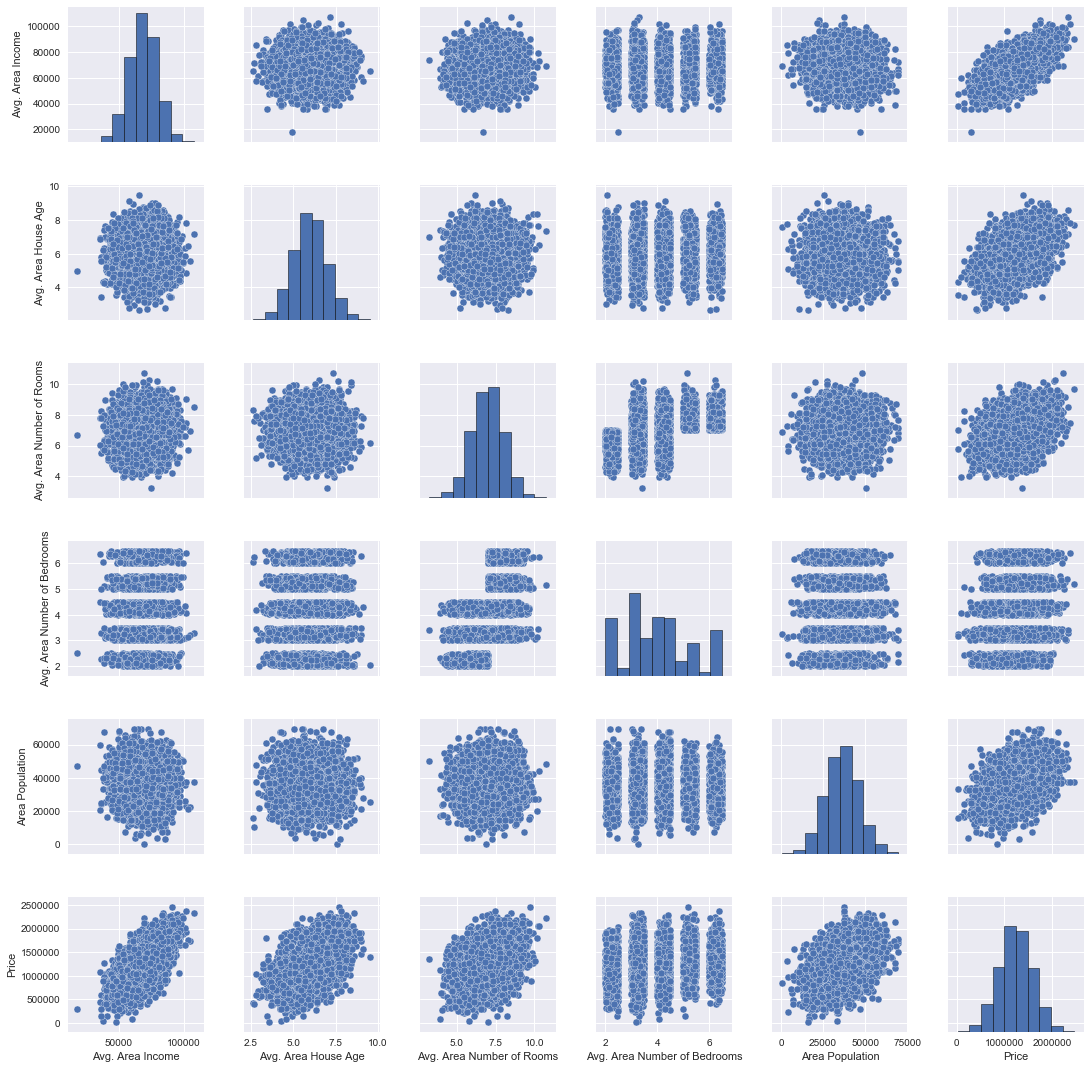

In [6]:
sns.pairplot(df, diag_kws=dict(edgecolor="k", linewidth=0.5))

In [7]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


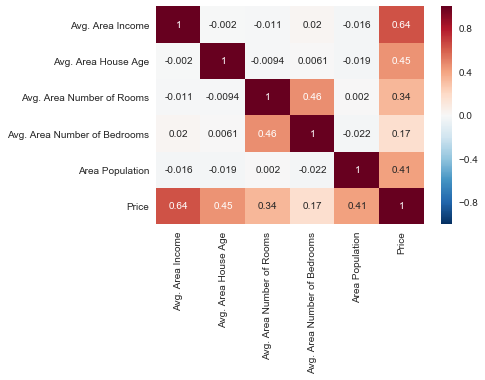

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [11]:
y = df['Price']

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(normalize=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [17]:
predictions = model.predict(X_test)

In [18]:
predictions

array([  687160.92251992,  1556600.65634271,  1822652.51575518, ...,
        1064154.68293924,  1209148.42464062,   975253.11765557])

In [19]:
y_test.values

array([  660364.98133583,  1638094.53784797,  1890056.38519368, ...,
         896303.79917914,  1075314.59272162,   916344.2938351 ])

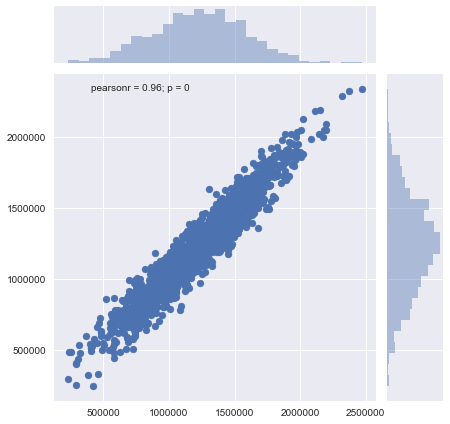

In [20]:
sns.jointplot(y_test.values, predictions)

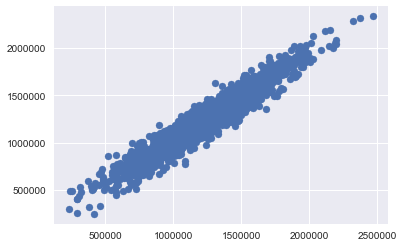

In [21]:
plt.scatter(y_test.values, predictions)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


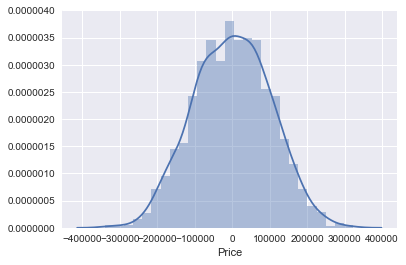

In [22]:
sns.distplot(y_test - predictions)

In [23]:
from sklearn import metrics

In [25]:
model.score(X_test, y_test)

0.91370764748860778

In [28]:
metrics.r2_score(y_test, predictions)

0.91370764748860789

## Lasso

In [25]:
from sklearn import linear_model

In [26]:
alp = [0.001, 0.1, 1, 10]

In [27]:
lasso_reg = linear_model.LassoCV(alphas=alp, normalize=True)

In [28]:
lasso_reg.fit(X_train, y_train)

LassoCV(alphas=[0.001, 0.1, 1, 10], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [29]:
lasso_pred = lasso_reg.predict(X_test)

In [30]:
lasso_reg.score(X_test, y_test)

0.91644319385137585

## Ridge

In [31]:
ridge_reg = linear_model.RidgeCV(alphas=alp, normalize=True)

In [32]:
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=[0.001, 0.1, 1, 10], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)

In [33]:
ridge_pred = ridge_reg.predict(X_test)

In [34]:
ridge_reg.score(X_test, y_test)

0.91641278324007458

## Elastic Net

In [35]:
l1_rat = [0.1, 0.4, 0.5, 0.7]

In [36]:
elastic_reg = linear_model.ElasticNetCV(alphas=alp, l1_ratio=l1_rat, normalize=False)

In [37]:
elastic_reg.fit(X_train, y_train)

ElasticNetCV(alphas=[0.001, 0.1, 1, 10], copy_X=True, cv=None, eps=0.001,
       fit_intercept=True, l1_ratio=[0.1, 0.4, 0.5, 0.7], max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [38]:
elastic_pred = elastic_reg.predict(X_test)

In [39]:
elastic_reg.score(X_test, y_test)

0.91639877350745746

## Polynomial

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly = PolynomialFeatures(degree=2)
xp = poly.fit_transform(X)

In [42]:
xp_train, xp_test, yp_train, yp_test = train_test_split(xp, y, test_size=0.3, random_state=101)

In [43]:
poly_linear = LinearRegression()

In [44]:
poly_linear.fit(xp_train, yp_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
poly_linear.score(xp_test, yp_test)

0.9174680648113327

## SVR

In [46]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.svm import SVR

In [49]:
svr_reg = SVR()

In [50]:
svr_reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
svr_reg.score(X_test, y_test)

-1.3013771256176199e-06

In [54]:
from sklearn.preprocessing import StandardScaler

In [112]:
svr_scaler = StandardScaler()

In [113]:
xtrain_svr = svr_scaler.fit_transform(X_train)

In [114]:
xtest_svr = svr_scaler.transform(X_test)

In [115]:
svr_scaler_y = StandardScaler()

In [116]:
ytrain_svr = svr_scaler_y.fit_transform(y_train.values.reshape(-1,1))

In [117]:
ytest_svr = svr_scaler_y.transform(y_test.values.reshape(-1,1))

In [118]:
svr2 = SVR(epsilon=0.001)

In [121]:
svr2.fit(xtrain_svr, ytrain_svr.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [122]:
svr2.score(xtest_svr, ytest_svr)

0.90493714666110114

In [108]:
grid_srv = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [109]:
grid_srv.fit(xtrain_svr, ytrain_svr.ravel())

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.629826, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.628109, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.647649, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.899587, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.882743, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.880813, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.916228, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.909727, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.901005, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [111]:
grid_srv.score(xtest_svr, ytest_svr)

0.91627633107531881

## Decision Tree Regression

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
dtree = DecisionTreeRegressor()

In [142]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [143]:
dtree.score(X_test, y_test)

0.74980101650814202

In [144]:
dtree_scaler = StandardScaler()

In [145]:
xtrain_dtree = dtree_scaler.fit_transform(X_train)

In [146]:
xtest_dtree = dtree_scaler.transform(X_test)

In [147]:
dtree_scaler_y = StandardScaler()

In [148]:
ytrain_dtree = dtree_scaler_y.fit_transform(y_train.values.reshape(-1,1))

In [149]:
ytest_dtree = dtree_scaler_y.transform(y_test.values.reshape(-1,1))

In [150]:
dtree2 = DecisionTreeRegressor()

In [151]:
dtree2.fit(xtrain_dtree, ytrain_dtree.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [152]:
dtree2.score(xtest_dtree, ytest_dtree)

0.7546924017156772

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
dtree3 = DecisionTreeRegressor()

In [155]:
cross_val_score(dtree3, X, y, cv=10)

array([ 0.73262037,  0.72815862,  0.78100771,  0.77742885,  0.71523434,
        0.76269867,  0.75942847,  0.78358719,  0.75407165,  0.70844916])

In [156]:
dtree4 = DecisionTreeRegressor()

In [157]:
scaler1 = StandardScaler()

In [158]:
x_scaled = scaler1.fit_transform(X)

In [159]:
scaler2 = StandardScaler()

In [160]:
y_scaled = scaler2.fit_transform(y.values.reshape(-1,1))

In [186]:
cross_val_score(dtree4, x_scaled, y_scaled.ravel(), cv=4)

array([ 0.75659774,  0.75162114,  0.75368508,  0.74254789])

## Random Forest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [173]:
rfr = RandomForestRegressor(n_estimators=50)

In [174]:
cross_val_score(rfr, X, y, cv=4)

array([ 0.88504047,  0.8875541 ,  0.88236301,  0.87293975])

In [184]:
rfr2 = RandomForestRegressor(n_estimators=100)

In [185]:
cross_val_score(rfr2, x_scaled, y_scaled.ravel(), cv=4)

array([ 0.8853404 ,  0.8874711 ,  0.88377527,  0.87738813])